In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt

from helper_functions import *

In [2]:
train = pd.read_csv("../Data/IPUMS/non_normalized_cleaned_ipums_data.csv")

Pick an arbitrary $\delta$ value.

In [3]:
delta = 0.001

Function to calculate the privacy metrics given training and synthetic data, for a given delta value.

In [4]:
sXs_mnl = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/non_normalized_gmm_and_mnl_" + str(i) + ".csv") for i in range(20)]
# ad_sXs_mnl = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/ad_gmm_and_mnl_" + str(i) + ".csv") for i in range(20)]
sXs_cart = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/non_normalized_gmm_and_cart_" + str(i) + ".csv") for i in range(20)]
# ad_sXs_cart = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/ad_gmm_and_cart_" + str(i) + ".csv") for i in range(20)]
sXs_mostly = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/non_normalized_mostly_" + str(i) + ".csv") for i in range(10)]
# sXs_sp = [pd.read_csv("../Data/IPUMS/Synthetic Datasets/synthpop_baseline_" + str(i) + ".csv") for i in range(20)]

# Need to Change the Range Value for MOSTLY.AI Data Sets

In [5]:
pms_mnl = privacy_metrics(train_data=train, synthetic_datasets=sXs_mnl, type_of_synthetic="MNL", delta=delta)

C:\Users\cdbale\Box\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:120: RuntimeWarning: invalid value encountered in divide
  ratios_train = train_dists[:,1]/train_dists[:,-1]


In [6]:
# pms_ad_mnl = privacy_metrics(train_data=train, synthetic_datasets=ad_sXs_mnl, type_of_synthetic="AD-MNL", delta=delta)

In [7]:
pms_cart = privacy_metrics(train_data=train, synthetic_datasets=sXs_cart, type_of_synthetic="CART", delta=delta)

C:\Users\cdbale\Box\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:120: RuntimeWarning: invalid value encountered in divide
  ratios_train = train_dists[:,1]/train_dists[:,-1]


In [8]:
# pms_ad_cart = privacy_metrics(train_data=train, synthetic_datasets=ad_sXs_cart, type_of_synthetic="AD-CART", delta=delta)

In [9]:
pms_mostly = privacy_metrics(train_data=train, synthetic_datasets=sXs_mostly, type_of_synthetic="MOSTLY.AI", delta=delta)

C:\Users\cdbale\Box\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:120: RuntimeWarning: invalid value encountered in divide
  ratios_train = train_dists[:,1]/train_dists[:,-1]
C:\Users\cdbale\Box\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:149: RuntimeWarning: invalid value encountered in divide
  ratios_synthetic = synthetic_dists[:,0]/synthetic_dists[:,-1]
C:\Users\cdbale\Box\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:149: RuntimeWarning: invalid value encountered in divide
  ratios_synthetic = synthetic_dists[:,0]/synthetic_dists[:,-1]
C:\Users\cdbale\Box\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:149: RuntimeWarning: invalid value encountered in divide
  ratios_synthetic = synthetic_dists[:,0]/synthetic_dists[:,-1]
C:\Users\cdbale\Box\Ongoing Projects\optimized-sequential-synthesis\Code\helper_functions.py:149: RuntimeWarning: invalid value encountered in divide
  rati

In [10]:
# pms_sp = privacy_metrics(train_data=train, synthetic_datasets=sXs_sp, type_of_synthetic="Synthpop", delta=delta)

In [11]:
# privacy_results = pd.concat([pms_mnl, pms_ad_mnl.iloc[1:,:], pms_cart.iloc[1:,:], pms_ad_cart.iloc[1:,:], pms_mostly.iloc[1:,:]]).reset_index(drop=True)

In [12]:
privacy_results = pd.concat([pms_mnl, pms_cart.iloc[1:,:], pms_mostly.iloc[1:,:]]).reset_index(drop=True)

In [13]:
privacy_results = privacy_results.melt(id_vars=["Type"], value_vars=["IMS", "DCR", "NNDR"], var_name="Metric") 

In [14]:
privacy_results.to_csv("../Results/IPUMS/non_normalized_privacy_metrics.csv", index=False)

***

Examine how IMS diff changes with $\delta$

In [15]:
delta_vals = np.linspace(0.00001, 0.5, 40)

In [16]:
train_ims = ims_apply(train, [train], delta_vals, synthetic_is_train=True)
avg_mnl_ims = ims_apply(train, sXs_mnl, delta_vals)
# avg_ad_mnl_ims = ims_apply(train, ad_sXs_mnl, delta_vals)
avg_cart_ims = ims_apply(train, sXs_cart, delta_vals)
# avg_ad_cart_ims = ims_apply(train, ad_sXs_cart, delta_vals)
avg_mostly_ims = ims_apply(train, sXs_mostly, delta_vals)

Do any of the synthesis methods produce (on average) a higher IMS than the training data at any $\delta$ value?

In [17]:
np.sum(avg_mnl_ims > train_ims)

1

In [18]:
avg_mnl_ims > train_ims

array([[False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False]])

In [19]:
avg_mnl_ims

array([0.        , 0.21332905, 0.50838306, 0.80774768, 0.91667939,
       0.94019221, 0.95478494, 0.96469108, 0.97100063, 0.97555877,
       0.97902921, 0.98165745, 0.98374133, 0.9854859 , 0.98693314,
       0.98816774, 0.9891844 , 0.99009208, 0.9908559 , 0.99153654,
       0.99215397, 0.99271097, 0.99319869, 0.99363534, 0.99405328,
       0.9944295 , 0.99478726, 0.9951023 , 0.99538017, 0.99563679,
       0.99588761, 0.99619506, 0.99643399, 0.9966403 , 0.99682209,
       0.9970054 , 0.99716519, 0.99731386, 0.99745444, 0.99757959])

In [20]:
train_ims

[[0.613073686765509,
  0.8309684661906592,
  0.8902131920144016,
  0.9069914440016991,
  0.9426818908149437,
  0.949468031311313,
  0.953574101417909,
  0.9803191812132123,
  0.9857298893586035,
  0.9872671372802848,
  0.9901292501870993,
  0.9906703210016384,
  0.9918889945184975,
  0.9934262424401789,
  0.9943566819717228,
  0.9951101357228099,
  0.9953073484496046,
  0.995883816420235,
  0.996242844717733,
  0.9964501709176966,
  0.9971024899370942,
  0.9973806104492404,
  0.9974969153906834,
  0.9976233338052954,
  0.997850886951597,
  0.9978660571613504,
  0.9981947450393414,
  0.9983110499807843,
  0.9984374683953964,
  0.9984779222880722,
  0.998518376180748,
  0.9988925746879993,
  0.9990493335221181,
  0.9992010356196525,
  0.9992516029854973,
  0.9992768866684196,
  0.999332510770849,
  0.9993628511903558,
  0.9993679079269403,
  0.9994134185562006]]

In [21]:
# np.sum(avg_ad_mnl_ims > train_ims)

In [22]:
np.sum(avg_cart_ims > train_ims)

1

In [23]:
avg_cart_ims > train_ims

array([[False, False, False, False, False, False,  True, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False]])

In [24]:
avg_cart_ims[6]

0.9585319788021602

In [25]:
train_ims[0][6]

0.953574101417909

In [26]:
# np.sum(avg_ad_cart_ims > train_ims)

In [27]:
np.sum(avg_mostly_ims > train_ims)

0

Save data for plotting in R.

In [28]:
ims_results = pd.DataFrame({'Delta': delta_vals,
                            'Original': train_ims[0],
                            'MNL': avg_mnl_ims,
                            # 'AD-MNL': avg_ad_mnl_ims,
                            'CART': avg_cart_ims,
                            # 'AD-CART': avg_ad_cart_ims,
                            'MOSTLY.AI': avg_mostly_ims})

# ims_results = ims_results.melt(id_vars=["Delta"], value_vars=["Original", "MNL", "AD-MNL", "CART", "AD-CART", "MOSTLY.AI"], var_name="Type")
ims_results = ims_results.melt(id_vars=["Delta"], value_vars=["Original", "MNL", "CART", "MOSTLY.AI"], var_name="Type")
ims_results.to_csv("../Results/IPUMS/non_normalized_ims_metrics.csv", index=False)

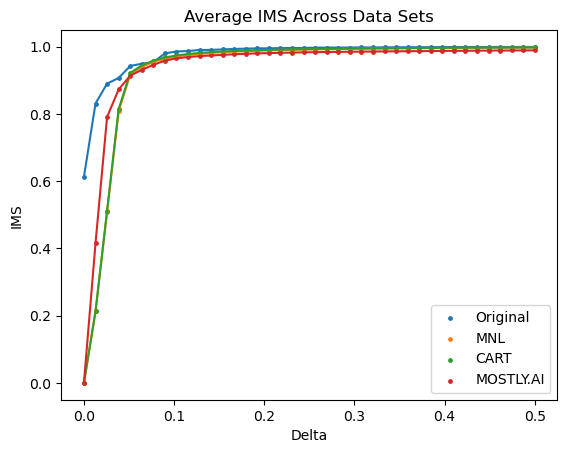

In [29]:
plt.plot(delta_vals, train_ims[0])
plt.scatter(delta_vals, train_ims, s=6, label="Original")

plt.plot(delta_vals, avg_mnl_ims)
plt.scatter(delta_vals, avg_mnl_ims, s=6, label="MNL")

# plt.plot(delta_vals, avg_ad_mnl_ims)
# plt.scatter(delta_vals, avg_ad_mnl_ims, s=6, label="AD-MNL")

plt.plot(delta_vals, avg_cart_ims)
plt.scatter(delta_vals, avg_cart_ims, s=6, label="CART")

# plt.plot(delta_vals, avg_ad_cart_ims)
# plt.scatter(delta_vals, avg_ad_cart_ims, s=6, label="AD - CART")

plt.plot(delta_vals, avg_mostly_ims)
plt.scatter(delta_vals, avg_mostly_ims, s=6, label="MOSTLY.AI")

plt.title("Average IMS Across Data Sets")
plt.xlabel("Delta")
plt.ylabel("IMS")

plt.legend()
plt.show()

***

Assess risk of attribute disclosure for `non_white`.

In [48]:
prior_non_white_prob = np.mean(train.non_white)

Create new set of deltas for attribute disclosure evaluation.

In [49]:
deltas = np.linspace(0.001, 1, 5)

Attribute disclosure assessment for MNL synthesized data.

In [50]:
ad_results_mnl = [attribute_disclosure_evaluation(original_data=train,
                                                  synthetic_data=Z,
                                                  continuous_vars=['incwage', 'years_of_educ', 'potential_experience'],
                                                  categorical_vars=['sex'],
                                                  sensitive_var='non_white',
                                                  prior_prob=prior_non_white_prob,
                                                  deltas=deltas) for Z in sXs_mnl]

Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.


In [51]:
ad_results_mnl = [pd.concat(x, axis=1) for x in ad_results_mnl]

for i in range(20):
    ad_results_mnl[i].to_csv("../Results/IPUMS/non_normalized_ad_metrics_mnl_" + str(i) + ".csv", index=False)
    
ad_results_mnl = [pd.read_csv("../Results/IPUMS/non_normalized_ad_metrics_mnl_" + str(i) + ".csv") for i in range(20)]

Attribute disclosure assessment for AD protected MNL synthesized data.

In [52]:
# ad_results_ad_mnl = [attribute_disclosure_evaluation(original_data=train,
#                                                      synthetic_data=Z,
#                                                      continuous_vars=['latitude', 'longitude'],
#                                                      categorical_vars=['sex', 'age'],
#                                                      sensitive_var='state',
#                                                      prior_prob=prior_death_prob,
#                                                      deltas=deltas) for Z in ad_sXs_mnl]

In [53]:
# ad_results_ad_mnl = [pd.concat(x, axis=1) for x in ad_results_ad_mnl]

# for i in range(20):
#     ad_results_ad_mnl[i].to_csv("../Results/SK/ad_metrics_ad_mnl_" + str(i) + ".csv", index=False)
    
# ad_results_ad_mnl = [pd.read_csv("../Results/SK/ad_metrics_ad_mnl_" + str(i) + ".csv") for i in range(20)]

Attribute disclosure assessment for CART synthesized data.

In [54]:
ad_results_cart = [attribute_disclosure_evaluation(original_data=train,
                                                   synthetic_data=Z,
                                                   continuous_vars=['incwage', 'years_of_educ', 'potential_experience'],
                                                   categorical_vars=['sex'],
                                                   sensitive_var='non_white',
                                                   prior_prob=prior_non_white_prob,
                                                   deltas=deltas) for Z in sXs_cart]

Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.


In [55]:
ad_results_cart = [pd.concat(x, axis=1) for x in ad_results_cart]

for i in range(20):
    ad_results_cart[i].to_csv("../Results/IPUMS/non_normalized_ad_metrics_cart_" + str(i) + ".csv", index=False)
    
ad_results_cart = [pd.read_csv("../Results/IPUMS/non_normalized_ad_metrics_cart_" + str(i) + ".csv") for i in range(20)]

Attribute disclosure assessment for AD protected CART synthesized data.

In [56]:
# ad_results_ad_cart = [attribute_disclosure_evaluation(original_data=train,
#                                                       synthetic_data=Z,
#                                                       continuous_vars=['latitude', 'longitude'],
#                                                       categorical_vars=['sex', 'age'],
#                                                       sensitive_var='state',
#                                                       prior_prob=prior_death_prob,
#                                                       deltas=deltas) for Z in ad_sXs_cart]

In [57]:
# ad_results_ad_cart = [pd.concat(x, axis=1) for x in ad_results_ad_cart]

# for i in range(20):
#     ad_results_ad_cart[i].to_csv("../Results/SK/ad_metrics_ad_cart_" + str(i) + ".csv", index=False)
    
# ad_results_ad_cart = [pd.read_csv("../Results/SK/ad_metrics_ad_cart_" + str(i) + ".csv") for i in range(20)]

Attribute disclosure assessment for MOSTLY.AI synthesized data.

In [58]:
ad_results_mostly = [attribute_disclosure_evaluation(original_data=train,
                                                     synthetic_data=Z,
                                                     continuous_vars=['incwage', 'years_of_educ', 'potential_experience'],
                                                     categorical_vars=['sex'],
                                                     sensitive_var='non_white',
                                                     prior_prob=prior_non_white_prob,
                                                     deltas=deltas) for Z in sXs_mostly]

Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.
Dataset completed.


In [59]:
ad_results_mostly = [pd.concat(x, axis=1) for x in ad_results_mostly]

for i in range(20):
    ad_results_mostly[i].to_csv("../Results/IPUMS/non_normalized_ad_metrics_mostly_" + str(i) + ".csv", index=False)
    
ad_results_mostly = [pd.read_csv("../Results/IPUMS/non_normalized_ad_metrics_mostly_" + str(i) + ".csv") for i in range(20)]

# NEED TO UPDATE THE RANGE INPUT FOR MOSTLY.AI DATA SETS

Calculate the maximum increase in inference in each data set for each delta value.

In [60]:
max_mnl = [np.max(x, axis=0) for x in ad_results_mnl]
# max_ad_mnl = [np.max(x, axis=0) for x in ad_results_ad_mnl]
max_cart = [np.max(x, axis=0) for x in ad_results_cart]
# max_ad_cart = [np.max(x, axis=0) for x in ad_results_ad_cart]
max_mostly = [np.max(x, axis=0) for x in ad_results_mostly]

Calculate the average of the maximum values across all synthetic data sets.

In [61]:
avg_max_mnl = np.mean(pd.concat(max_mnl, axis=1), axis=1)
# avg_max_ad_mnl = np.mean(pd.concat(max_ad_mnl, axis=1), axis=1)
avg_max_cart = np.mean(pd.concat(max_cart, axis=1), axis=1)
# avg_max_ad_cart = np.mean(pd.concat(max_ad_cart, axis=1), axis=1)
avg_max_mostly = np.mean(pd.concat(max_mostly, axis=1), axis=1)

Save the attribute disclosure risk results for plotting in R.

In [62]:
all_ad_results = pd.DataFrame({'Delta': deltas,
                               'MNL': avg_max_mnl,
                               # 'AD-MNL': avg_max_ad_mnl,
                               'CART': avg_max_cart,
                               # 'AD-CART': avg_max_ad_cart,
                               'MOSTLY.AI': avg_max_mostly})

# all_ad_results = all_ad_results.melt(id_vars=["Delta"], value_vars=["MNL", "AD-MNL", "CART", "AD-CART", "MOSTLY.AI"], var_name="Type")
all_ad_results = all_ad_results.melt(id_vars=["Delta"], value_vars=["MNL", "CART", "MOSTLY.AI"], var_name="Type")
all_ad_results.to_csv("../Results/IPUMS/non_normalized_all_ad_results.csv", index=False)

Plot the average (across synthetic data sets) maximum increase in attribute disclosure risk.

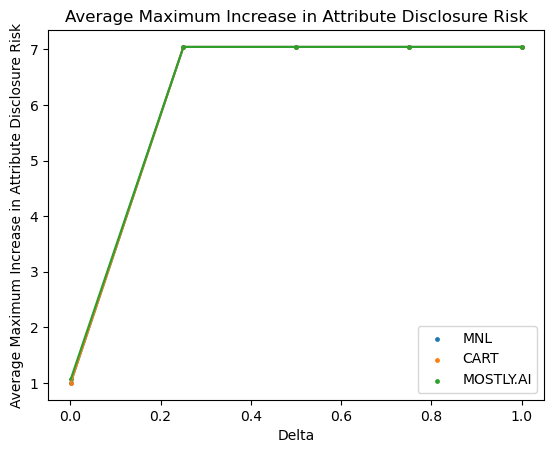

In [63]:
plt.plot(deltas, avg_max_mnl)
plt.scatter(deltas, avg_max_mnl, s=6, label="MNL")

# plt.plot(deltas, avg_max_ad_mnl)
# plt.scatter(deltas, avg_max_ad_mnl, s=6, label="AD - MNL")

plt.plot(deltas, avg_max_cart)
plt.scatter(deltas, avg_max_cart, s=6, label="CART")

# plt.plot(deltas, avg_max_ad_cart)
# plt.scatter(deltas, avg_max_ad_cart, s=6, label="AD - CART")

plt.plot(deltas, avg_max_mostly)
plt.scatter(deltas, avg_max_mostly, s=6, label="MOSTLY.AI")

plt.title("Average Maximum Increase in Attribute Disclosure Risk")
plt.xlabel("Delta")
plt.ylabel("Average Maximum Increase in Attribute Disclosure Risk")

plt.legend()
plt.show()